In [1]:
# add path to sispeuede to sys.path in python
import sys
import pathlib
import warnings
warnings.filterwarnings("ignore")


path_git = pathlib.Path("/Users/usuario/git")
for subdir in [
    "sisepuede", 
    "sisepuede_data_pipeline",
    # "sisepuede_juypyter"
]:
    path_cur = path_git.joinpath(subdir)
    if str(path_cur) not in sys.path:
        sys.path.append(str(path_cur))

path_pipeline = path_git.joinpath("sisepuede_data_pipeline")


import importlib
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import sisepuede.legacy.data_api as api
import sisepuede.manager.sisepuede_examples as sxl
import sisepuede.manager.sisepuede_file_structure as sfs
import sisepuede.manager.sisepuede_models as sm
import sisepuede.visualization.plots as svp
import sisepuede.utilities._plotting as spu
import sisepuede.core.support_classes as sc
import sisepuede.utilities._toolbox as sf
import time

from sisepuede.core.attribute_table import *
from typing import *


import lib.process_utilities as pu
import lib.sisepuede_data_constructs as dc
import lib._util as lutil




In [15]:
### SETUP DIRECTORIES

path_cur = pathlib.Path(os.getcwd())
path_data = path_cur.joinpath("data")
path_transformations = path_cur.joinpath("transformations")
path_attr_tp = path_transformations.joinpath("attribute_dim_time_period.csv")


##  SETUP FILES




##  SETUP SOME PIPELINE STUFF

# get the time period
attr_time_period = AttributeTable(path_attr_tp, "time_period")
file_struct = sfs.SISEPUEDEFileStructure(
    attribute_time_period = attr_time_period,
)

# assign some shortcuts
matt = file_struct.model_attributes
regions = sc.Regions(matt)
time_periods = sc.TimePeriods(matt)


##  SOME GLOBALS

_REGION_NAME = "morocco"
_REGION_ISO = regions.return_region_or_iso(_REGION_NAME, return_type = "iso", )

path_data_built = pathlib.Path(
    os.path.abspath(f"../generic_regions/data/output/sisepuede_raw_inputs_latest_{_REGION_ISO}.csv")
)

In [3]:
models = sm.SISEPUEDEModels(
    matt, 
    fp_julia = file_struct.dir_jl,
    fp_nemomod_reference_files = file_struct.dir_ref_nemo,
)

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


Precompiling NemoMod...
Info Given NemoMod was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
   4261.0 ms  ? NemoMod
[ Info: Precompiling NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72] 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
┌ Info: Skipping precompilation due to precompilable error. Importing NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72].
└   exception = Error when precompiling module, potentially caused by a __precompile__(false) declaration in the module.


In [16]:
df_morocco = pd.read_csv(path_data_built, )
df_morocco[regions.key] = _REGION_NAME


In [17]:
import sisepuede.transformers as trf
import sisepuede.transformers.transformations as tmts
importlib.reload(tmts.trs.tbe)
importlib.reload(tmts.trs)

# initialize a transformations set
if not path_transformations.is_dir():
    trf.instantiate_default_strategy_directory(
        transformers,
        path_transformations,
    )




transformations = tmts.Transformations(
    path_transformations,
    attr_time_period = attr_time_period,
    df_input = df_morocco,
)
transformers = transformations.transformers

strategies = trf.Strategies(
    transformations,
    export_path = "transformations",
    prebuild = True,
)







In [47]:
[x for x in df_out.columns if ("emission_co2e" in x) and ("entc" in x)]

,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,area_agrc_crops_other_woody_perennial,area_agrc_crops_pulses,...,yield_agrc_fruits_tonne,yield_agrc_herbs_and_other_perennial_crops_tonne,yield_agrc_nuts_tonne,yield_agrc_other_annual_tonne,yield_agrc_other_woody_perennial_tonne,yield_agrc_pulses_tonne,yield_agrc_rice_tonne,yield_agrc_sugar_cane_tonne,yield_agrc_tubers_tonne,yield_agrc_vegetables_and_vines_tonne
0,0,0.0,4.609331e+06,4085.468561,1.190441e+06,28242.323335,152999.613918,9.503432e+05,218.985173,417472.827076,...,1.354515e+07,0.000000,482431.919137,0.000000e+00,0.0,3.752344e+05,0.000000,0.000000,3.310269e+05,9.027442e+05
1,1,0.0,4.560555e+06,4042.236066,1.177843e+06,27943.462606,151380.569494,9.402867e+05,216.667869,413055.122772,...,1.343243e+07,0.000000,476726.090719,0.000000e+00,0.0,3.742232e+05,0.000000,0.000000,3.244793e+05,8.962450e+05
2,2,0.0,4.672405e+06,4141.374219,1.206731e+06,28628.792023,155093.264619,9.633478e+05,221.981772,423185.536112,...,1.386212e+07,0.000000,488759.992710,0.000000e+00,0.0,3.862935e+05,0.000000,0.000000,3.362610e+05,9.098950e+05
3,3,0.0,4.759936e+06,4218.957338,1.229337e+06,29165.114227,157998.729910,9.813948e+05,226.140304,431113.352256,...,1.395145e+07,0.000000,500119.428055,0.000000e+00,0.0,3.978071e+05,0.000000,0.000000,3.408580e+05,9.186679e+05
4,4,0.0,4.709498e+06,4174.251507,1.216311e+06,28856.068519,156324.509507,9.709955e+05,223.744027,426545.095468,...,1.371747e+07,0.000000,493984.211483,0.000000e+00,0.0,3.981056e+05,0.000000,0.000000,3.340458e+05,9.218377e+05
5,5,0.0,4.751718e+06,4211.672597,1.227214e+06,29114.755746,157725.918495,9.797002e+05,225.749835,430368.962452,...,1.379750e+07,0.000000,497743.280782,0.000000e+00,0.0,4.053274e+05,0.000000,0.000000,3.381977e+05,9.280689e+05
6,6,0.0,4.793343e+06,4248.566710,1.237965e+06,29369.800045,159107.592336,9.882824e+05,227.727396,434138.980360,...,1.387626e+07,0.000000,501515.952763,0.000000e+00,0.0,4.125629e+05,0.000000,0.000000,6.999847e+05,9.303390e+05
7,7,0.0,4.834381e+06,4284.941251,1.248564e+06,29621.252611,160469.808360,9.967437e+05,229.677108,437855.905914,...,1.951733e+07,469461.092673,294093.115026,2.925233e+06,0.0,1.241625e+06,24539.936953,605840.024829,2.071257e+06,2.511969e+06
8,8,0.0,4.874842e+06,4320.803517,1.259013e+06,29869.163880,161812.839811,1.005086e+06,231.599361,441520.484682,...,1.968068e+07,473390.186992,296554.489580,2.949716e+06,0.0,1.252016e+06,24745.320804,610910.525105,2.088592e+06,2.532992e+06
9,9,0.0,4.914733e+06,4356.160695,1.269316e+06,30113.583549,163136.955909,1.013310e+06,233.494541,445133.451256,...,1.984173e+07,477263.943661,298981.197956,2.973853e+06,0.0,1.262262e+06,24947.812013,615909.612087,2.105683e+06,2.553720e+06


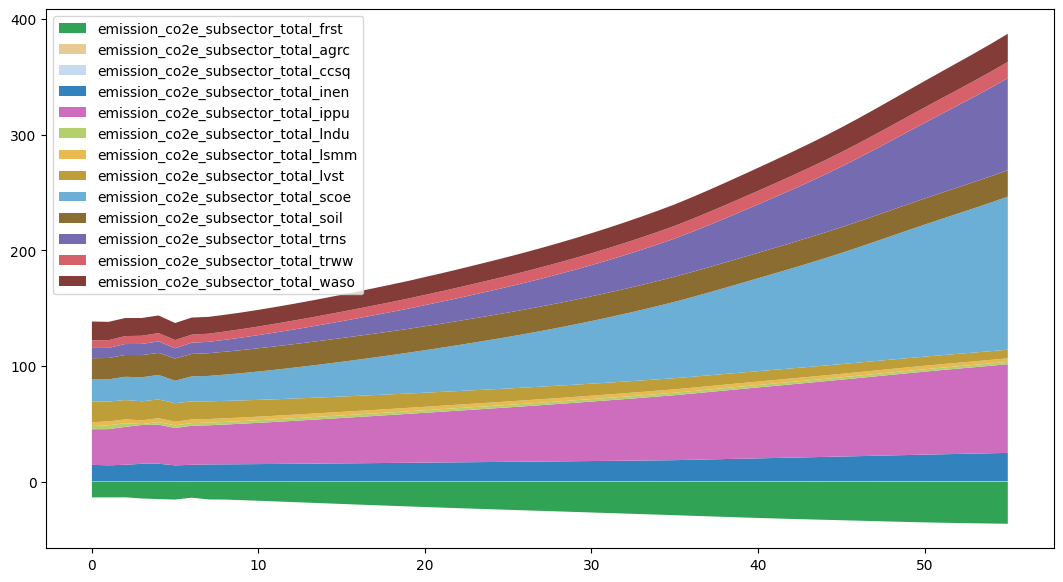

In [46]:
df_morocco2 = df_morocco.copy()

# adjust the elasticities of production
modvar = matt.get_variable("Elasticity of Industrial Production to GDP")
df_morocco2[modvar.fields] = 0.5

# adjust SCOE elasticities
_MODVAR_SCOE_ELAST_GDP_APP = matt.get_variable("SCOE Elasticity of Per GDP Electrical Applicance Demand to GDP Per Capita")
_MODVAR_SCOE_ELAST_GDP_HEAT = matt.get_variable("SCOE Elasticity of Per GDP Heat Energy Demand to GDP Per Capita")
_MODVAR_SCOE_ELAST_HH_APP = matt.get_variable("SCOE Elasticity of Per Household Electrical Applicance Demand to GDP Per Capita")
_MODVAR_SCOE_ELAST_HH_HEAT = matt.get_variable("SCOE Elasticity of Per Household Heat Energy Demand to GDP Per Capita")

df_morocco2[_MODVAR_SCOE_ELAST_GDP_APP.fields] = 0.5
df_morocco2[_MODVAR_SCOE_ELAST_GDP_HEAT.fields] = 0.5
df_morocco2[_MODVAR_SCOE_ELAST_HH_APP.fields] = 0.5
df_morocco2[_MODVAR_SCOE_ELAST_HH_HEAT.fields] = 0.5





df_morocco2["lndu_reallocation_factor"] = 0
df_out = models(df_morocco2, include_electricity_in_energy = False, )

fig, ax = plt.subplots(figsize = (13, 7))
svp.plot_emissions_stack(df_out, matt, figtuple = (fig, ax), )
ax.legend()

In [37]:
df_out[[x for x in df_out.columns if "prod_ippu_" in x]]

,prod_ippu_cement_tonne,prod_ippu_chemicals_tonne,prod_ippu_electronics_tonne,prod_ippu_glass_tonne,prod_ippu_lime_and_carbonite_tonne,prod_ippu_metals_tonne,prod_ippu_mining_tonne,prod_ippu_paper_tonne,prod_ippu_plastic_tonne,prod_ippu_rubber_and_leather_tonne,prod_ippu_textiles_tonne,prod_ippu_wood_tonne
0,1.111904e+07,1.627771e+06,6.831594e+05,19734.110108,4151.693741,2.131379e+06,9.168393e+06,6.144506e+05,331842.438694,0.000000,277637.694981,1.830164e+07
1,1.114803e+07,1.632015e+06,6.849407e+05,19598.123677,4162.518639,2.136702e+06,9.192298e+06,6.152740e+05,331957.906145,0.000000,278237.599355,1.834904e+07
2,1.143002e+07,1.673296e+06,7.022658e+05,20227.284435,4267.806776,2.190916e+06,9.424811e+06,6.311335e+05,340888.317401,0.000000,285409.626744,1.881349e+07
3,1.160514e+07,1.698933e+06,7.130254e+05,20537.734207,4333.195165,2.224484e+06,9.569212e+06,6.406569e+05,346113.338032,0.000000,289809.097127,1.910179e+07
4,1.177293e+07,1.723496e+06,7.233344e+05,20828.012215,4395.844657,2.256637e+06,9.707564e+06,6.497501e+05,351090.827970,0.000000,294019.732553,1.937800e+07
5,1.135051e+07,1.661656e+06,6.973807e+05,19341.553612,4238.119178,2.174744e+06,9.359251e+06,6.238054e+05,335536.934260,0.000000,282904.783128,1.868127e+07
6,1.180561e+07,1.728281e+06,7.253424e+05,21717.422558,4408.048035,2.263942e+06,9.734513e+06,6.548453e+05,355391.854520,0.000000,295417.549748,1.943329e+07
7,1.187988e+07,1.739153e+06,7.299054e+05,21842.360344,4435.778000,2.278169e+06,9.795751e+06,6.588563e+05,357580.813663,0.000000,297278.643499,1.955555e+07
8,1.205908e+07,1.765388e+06,7.409160e+05,22285.512116,4502.691711,2.312677e+06,9.943520e+06,6.691103e+05,363429.559302,0.000000,301865.219271,1.985079e+07
9,1.224871e+07,1.793149e+06,7.525669e+05,22760.447566,4573.496538,2.349200e+06,1.009988e+07,6.799843e+05,369642.472211,0.000000,306722.495666,2.016322e+07


In [96]:
strat0 = strategies.get_strategy(0)
df0 = strat0()

df_out = models(
    df0, 
    include_electricity_in_energy = True, 
    time_periods_base = range(11),
)

2025-03-Nov 20:25:11.993 Opened SQLite database at /Users/usuario/git/sisepuede_region_nbs/morocco/tmp0ndssv7r.sqlite.
2025-03-Nov 20:25:12.002 Added NEMO structure to SQLite database at /Users/usuario/git/sisepuede_region_nbs/morocco/tmp0ndssv7r.sqlite.
2025-03-Nov 20:25:12.792 Started modeling scenario. NEMO version = 2.2.0, solver = HiGHS.
2025-03-Nov 20:25:12.836 Started optimizing following years: [1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010].
2025-03-Nov 20:25:22.414 Finished optimizing following years: [1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010].
set ['emission_co2e_co2_entc_bmass_processing_and_refinement_fp_hydrogen_gasification'] = 0 in energy production. FIX WITH NEW fp_hydrogen_gasification_biomass TECH.


In [12]:
df_tmp[[x for x in df_tmp.columns if "renewable_energy_tag" in x]].iloc[-1]

nemomod_entc_renewable_energy_tag_pp_biogas                0
nemomod_entc_renewable_energy_tag_pp_biomass               0
nemomod_entc_renewable_energy_tag_pp_coal                  0
nemomod_entc_renewable_energy_tag_pp_coal_ccs              0
nemomod_entc_renewable_energy_tag_pp_gas                   0
nemomod_entc_renewable_energy_tag_pp_gas_ccs               0
nemomod_entc_renewable_energy_tag_pp_geothermal            1
nemomod_entc_renewable_energy_tag_pp_hydropower            1
nemomod_entc_renewable_energy_tag_pp_nuclear               0
nemomod_entc_renewable_energy_tag_pp_ocean                 1
nemomod_entc_renewable_energy_tag_pp_oil                   0
nemomod_entc_renewable_energy_tag_pp_solar                 1
nemomod_entc_renewable_energy_tag_pp_waste_incineration    0
nemomod_entc_renewable_energy_tag_pp_wind                  1
nemomod_entc_renewable_energy_tag_st_batteries             0
nemomod_entc_renewable_energy_tag_st_compressed_air        0
nemomod_entc_renewable_e

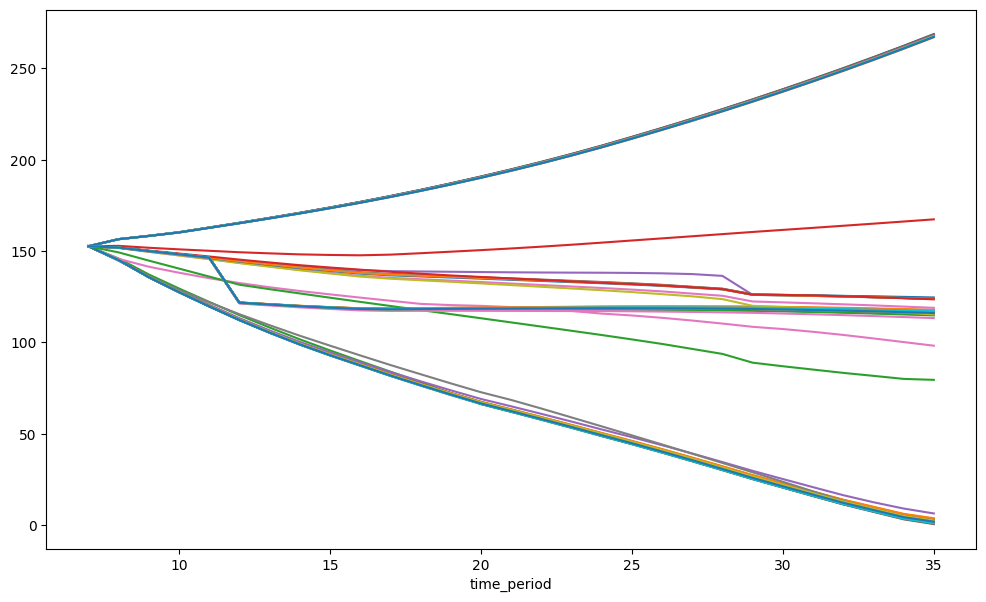

In [26]:
df_tmp2 = pd.read_csv("/Users/usuario/Downloads/sisepuede_run_2025-11-03T09;10;48.153767/decomposed_ssp_output.csv")

# get rid of nas
flds = [x for x in df_tmp2.columns if x.startswith("emission_co2e_subsector")]

arr = df_tmp2[flds].to_numpy()
w = np.where(arr > 10000)
arr[w] = np.nan
df_tmp2[flds] = arr
df_tmp2[flds] = df_tmp2[flds].interpolate()

df_tmp2["total"] = df_tmp2[[x for x in df_tmp2.columns if x.startswith("emission_co2e_subsector")]].sum(axis = 1)
dfg = df_tmp2[["primary_id", "time_period", "total"]].groupby(["primary_id"])

df_tmp2
fig, ax = plt.subplots(figsize = (12, 7))
for i, df in dfg:
    
    df.plot(ax = ax, x = "time_period", y = "total", legend = False)




In [24]:
[x for x in dir(ax) if "legend" in x]

['_remove_legend',
 'get_legend',
 'get_legend_handles_labels',
 'legend',
 'legend_']

In [11]:

df_tmp["nemomod_enfu_renewable_energy_minimum_production_target_fuel_electricity"]

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.041304
14    0.082609
15    0.123913
16    0.165217
17    0.206522
18    0.247826
19    0.289130
20    0.330435
21    0.371739
22    0.413043
23    0.454348
24    0.495652
25    0.536957
26    0.578261
27    0.619565
28    0.660870
29    0.702174
30    0.743478
31    0.784783
32    0.826087
33    0.867391
34    0.908696
35    0.950000
Name: nemomod_enfu_renewable_energy_minimum_production_target_fuel_electricity, dtype: float64

In [5]:
df_tmp = (
    pd
    .read_csv("/Users/usuario/Downloads/libya_input_data_strategy_6003.csv")
    .drop(columns = ["year", "strategy_id"])
)

"""
df_out_tmp = models.project(
    df_tmp, 
    solver_time_limit = 300,
    time_periods_base = range(12),
)
"""



'\ndf_out_tmp = models.project(\n    df_tmp, \n    solver_time_limit = 300,\n    time_periods_base = range(12),\n)\n'

In [ ]:
df_out = models(
    strategies.get_strategy(0)(), 
    include_electricity_in_energy = False, 
)

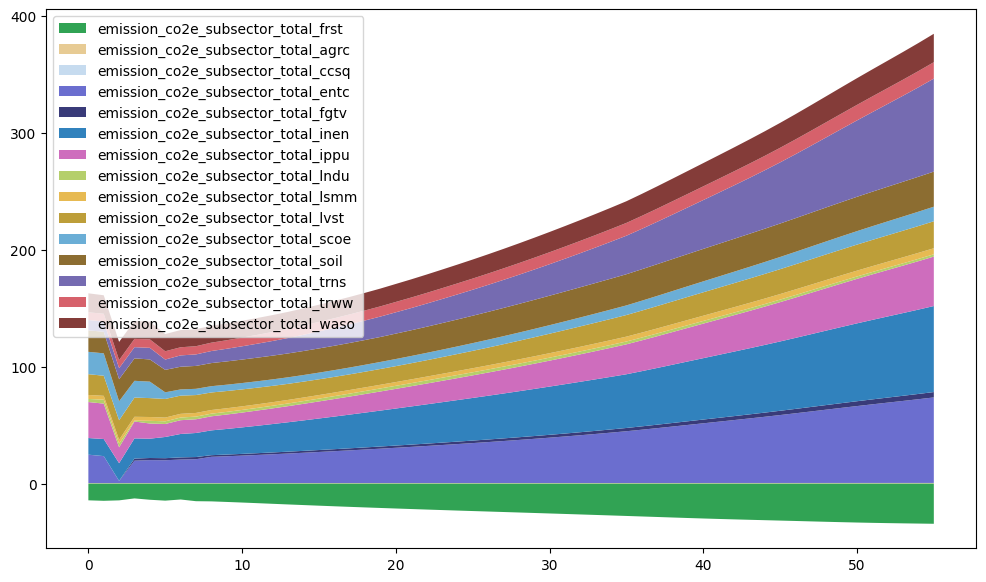

In [70]:
fig, ax = plt.subplots(figsize = (12, 7))
svp.plot_emissions_stack(df_out, matt, figtuple = (fig, ax, ))
ax.legend()